In [2]:
from miscpy.utils.sympyhelpers import *
init_printing()

In [18]:
a,mu,e,r,R,ell = symbols('a,mu,e,r,R,l',real=True,positive=True)
rd,ed,I,Id,O,Od,w,wd,th,thd,h,hd,t,f_r,f_th,f_h,v_r,v_th,nu,nud,l,phi,J2 = \
symbols("rdot,edot,I,Idot,Omega,Omegadot,omega,omegadot,theta,thetadot,h,hdot,t,\
f_r,f_theta,f_h,v_r,v_theta,nu,nudot,lambda,phi,J_2",real=True)

Define required rotation matrices: $\Omega$ rotation about $\mathbf{\hat{e}}_3$ -> Frame $\mathcal A_1$, $I$ about  $\mathbf{\hat{n}}$-> Frame $\mathcal A_2$ and $\theta$ rotation about $\mathbf{\hat{h}}$ -> Frame $\mathcal B$ (rotating frame)

For spherical frame it's $\lambda$ about $\mathbf{\hat{e}}_3$ -> Frame $\mathcal B_1$ and $\phi$ about $\mathbf{\hat{a}}_1$ -> Frame $\mathcal S = (P,\mathbf{\hat{\phi}},\mathbf{\hat{\lambda}},\mathbf{\hat{r}})$

In [19]:
A1_C_I = rotMat(3,O)
A2_C_A1 = rotMat(1,I)
B_C_A2 = rotMat(3,th)
B_C_I = B_C_A2*A2_C_A1*A1_C_I

B1_C_I = rotMat(3,l)
S_C_B1 = rotMat(2,phi)
S_C_I = S_C_B1*B1_C_I

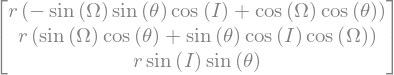

In [20]:
r1 = transpose(B_C_I)*Matrix([r,0,0]);r1

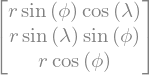

In [21]:
r2 = S_C_I.transpose()*Matrix([0,0,r]);r2

Matching the third component of the two matrices shows that $\sin(I)\sin(\theta) = \cos\phi$

Next we define the perturbing potential as the $J_2$ term of the azimuthally symmetric body potential

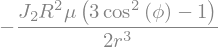

In [22]:
U1 = -mu/r*(J2*(R/r)**2*(3*cos(phi)**2 - 1)/2);U1

Define $\mathcal S$ frame so that it is ordered $(\mathbf{\hat{r}},\mathbf{\hat{\phi}},\mathbf{\hat{\lambda}})$

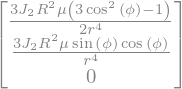

In [23]:
f_S = (Matrix([diff(U1,r),diff(U1,phi)/r,0]));f_S 

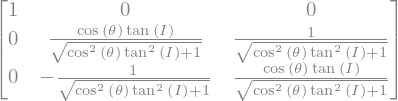

In [24]:
B_C_S = rotMat(1,pi/2-atan(cos(th)*tan(I))); B_C_S

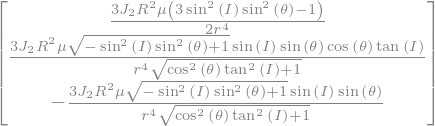

In [25]:
t1 = simplify((B_C_S*f_S).subs(phi,acos(sin(I)*sin(th))));t1

Will need to do some simplification manually here.  First, let's convince ourselves that $$\frac{1 - \sin^2(I)\cos^2(\theta)}{\cos^2(I) + \cos(\theta)^2\sin^2(I)} = 1$$

In [26]:
simplify((1 - sin(I)**2*sin(th)**2)/(cos(I)**2 + cos(th)**2*sin(I)**2))

Similarly, we can then show that $$\frac{1 - \sin^2(I)\cos^2(\theta)}{1 + \tan^2(I)\cos(\theta)^2} = \cos^2(I)$$

In [30]:
simplify((((1 - sin(I)**2*sin(th)**2)/(1 + cos(th)**2*tan(I)**2)))- cos(I)**2)

Great, so let's do the substitution to get rid of those gross square roots

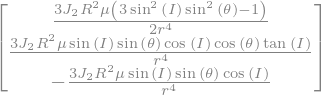

In [31]:
f_B = (t1.subs((sqrt((1 - sin(I)**2*sin(th)**2)/(1 + cos(th)**2*tan(I)**2))),cos(I))); f_B

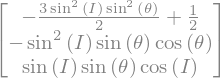

In [35]:
simplify(f_B/(-3*J2*R**2*mu/r**4))

$\dot\Omega$ due to $J_2$

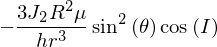

In [33]:
OdJ2 = r*sin(th)/h/sin(I)*f_B[2]
OdJ2

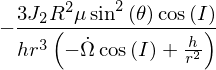

In [34]:
dOdJ2dth = OdJ2/(h/r**2 - Od*cos(I))
dOdJ2dth

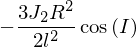

In [35]:
simplify(integrate(-3*J2*(R/ell)**2*cos(I)*sin(th)**2*(1 + e*cos(th-w)),(th,0,2*pi)))/2/pi

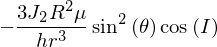

In [36]:
diff(U1.subs(phi,acos(sin(I)*sin(th))),I)/h/sin(I)

$\dot\omega$ due to $J_2$

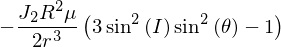

In [37]:
U1a = simplify(U1.subs([(phi,acos(sin(I)*sin(th)))])); 
U1a

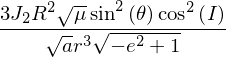

In [38]:
dwJ2 = simplify( 1/sqrt(a*mu) *(sqrt(1-e**2)/e*diff(U1a,e) -  diff(U1a,I)/sqrt(1-e**2)/tan(I)))
dwJ2

Time Averaging

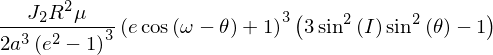

In [39]:
U1b = simplify(U1.subs([(phi,acos(sin(I)*sin(th))),(r,a*(1-e**2)/(1+e*cos(th-w)))]));U1b

In [40]:
simplify(integrate((1+e*cos(nu)),(nu,0,2*pi)))

In [41]:
simplify(integrate((1+e*cos(nu))*(sin(w+nu)**2),(nu,0,2*pi)))

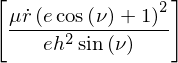

In [42]:
solve(difftotal(h**2/mu/(1 + e*cos(nu)),t,{nu:nud})-rd,nud)

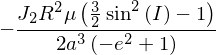

In [43]:
U1sec = -J2*mu*R**2/2/a**3/(1-e**2)**(3/2)*(3*sin(I)**2/2-1);U1sec

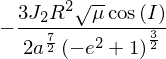

In [44]:
simplify(diff(U1sec,I)/sqrt(mu*a*(1-e**2))/sin(I))